In [113]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1148s 5us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [105]:
data_dir

WindowsPath('C:/Users/JY810251/.keras/datasets/flower_photos')

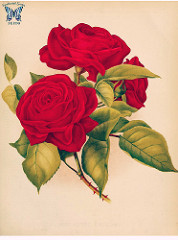

In [102]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[np.random.randint(100)]))

## データセットの作成
- 訓練、検証、テスト用に分ける

In [103]:
batch_size = 32
img_height = 180
img_width = 180

In [107]:
# 訓練用
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [111]:
# 検証用
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [114]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

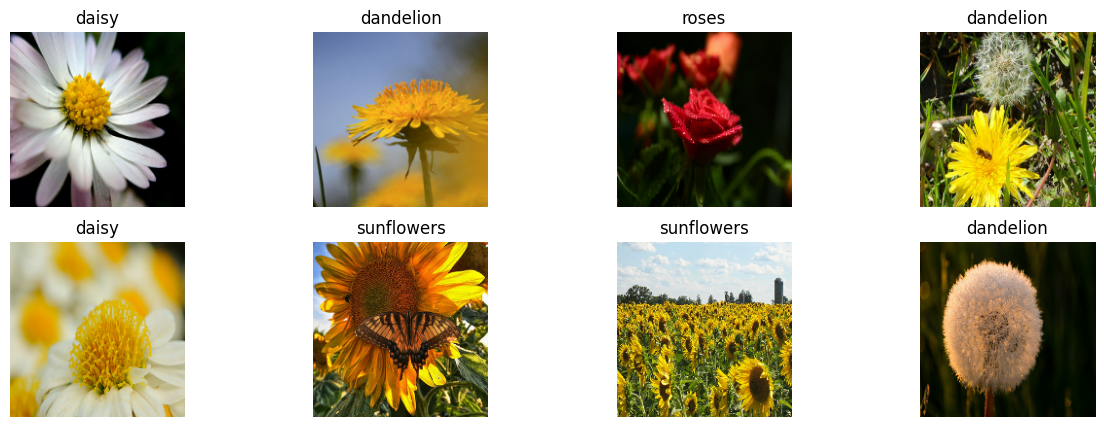

In [118]:
plt.figure(figsize=(15, 5))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [121]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [127]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [128]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [131]:
num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

In [132]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [133]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.3969 - loss: 1.3866 - val_accuracy: 0.5817 - val_loss: 1.0488
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.6327 - loss: 0.9687 - val_accuracy: 0.6226 - val_loss: 0.9767
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 350ms/step - accuracy: 0.7003 - loss: 0.7980 - val_accuracy: 0.6403 - val_loss: 0.9285
